# <center>Chemical Engineering Programs</center>

This notebook contains a prelmininary analyses of the curricula and degree plans associated with undergraduate chemical engineering programs around the country.  In order to execute the analyses provided in this notebook, you need to load the following Julia packages:

In [1]:
using CurricularAnalytics, CurricularVisualization
#using CurricularOptimization # this package requires special access rights, if you commented out, you won't be able to run the optimzation-related functions
using Glob
using CSV
using DataFrames
using Statistics

WebIO._IJuliaInit()

## Curricular Analytics

The analyses in this notebook makes use of the Curricular Analytics toolbox built using the Julia programming language and available as open source software [1]. If you would like to modify any of these analyses, you may find it useful to read the toolbox documenation, as well as the curricular analytics paper listed in the References section below [2]. The curricula associated with chemcial engineering undergraduate programs at various univiersites were collected from the http://CurricularAnalytics.org website. These curricula were entered by those working at the various institutions that uploaded these curricula.  We have *not* validated them in any way, i.e., we are using them "as is" according to how they were entered into the afforementioned web application.  That said, it is realitvely straightforward to check these curricula by visiting the websites of the various universites offering these programs.  

### What is Curricular Complexity?



In [2]:
UA_ChemE_plan = read_csv("./programs/plans/ChemE-DP-UA.csv")
visualize(UA_ChemE_plan, notebook=true)

LoadError: SystemError: opening file "./programs/plans/ChemE-DP-UA.csv": No such file or directory

In [3]:
metrics = basic_metrics(UA_ChemE_plan)
println(String(take!(metrics)))

LoadError: UndefVarError: UA_ChemE_plan not defined

In [64]:
metrics = basic_metrics(UA_ChemE_plan.curriculum)
println(String(take!(metrics)))


University of Arizona 
Curriculum: Chemical Engineering
  credit hours = 128
  number of courses = 45
  Blocking Factor --
    entire curriculum = 171
    max. value = 24, for course(s): MATH 125 - Calculus I w/ Applications
  Centrality --
    entire curriculum = 2196
    max. value = 287, for course(s): CHEE 201 - Elements of Chem and Envirn Eng I
  Delay Factor --
    entire curriculum = 215.0
    max. value = 8.0, for course(s): MATH 125 - Calculus I w/ Applications, CHEM 151 - Gen Chemistry I, MATH 129 - Calculus II, CHEM 152 - Gen Chemistry II, PHYS 141 - Intro Mechanics, CHEE 201 - Elements of Chem and Envirn Eng I, CHEE 203 - Chem Eng Heat Xfer & Fluid Flow, PHYS 241 - Electricity & Magnetism, CHEE 303 - Chem Eng Mass Xfer, CHEE 402 - Chem Eng Modeling, CHEM 480A - Physical Chem, CHEE 305 - Chem Eng Transport Phenom, CHEE 326 - Chem & Phys Equilibrium, CHEE 301B - Chem Eng Lab II, CHEE 420 - Chem Reaction Eng, CHEE 442 - Chem Eng Design Principles, CHEE 401B - Process Dynamics

### Why does it Matter?
Here is the complexity distrubtion of all undergraduate programs at the Unviersity of Arizona

In [65]:
df = DataFrame(CSV.File("./Complexity_x_Grad_UA.csv"));
histogram(df.complexity_score, nbins=50, xlabel="Program Complexity", ylabel="# of programs", label="")

LoadError: ArgumentError: "./Complexity_x_Grad_UA.csv" is not a valid file

In [ ]:
 = Array{Integer,1}() # curricular complexity score of program
Y = Array{Bool,1}() # did student graduate within 4 years?
Z = Array{Bool,1}() # did student graduate within 6 years?
for row in eachrow(df)
  for t in 1:row["four"] 
    push!(X, row["complexity_score"])
    push!(Y, 1); push!(Z, 1)
  end
  s = row["total_degrees_awarded"] - row["six"]
  for t in 1:(row["total_degrees_awarded"] - row["four"])
    push!(X, row["complexity_score"])
    push!(Y, 0)
    s > 0 ? (push!(Z, 1); s=s-1) : push!(Z, 0)
  end
end
df_binary = DataFrame(Program_Complexity = X, grad4 = Y, grad6 = Z);
histogram(X, nbins=50, xlabel="Program Complexity", ylabel="# of students", label="")

In [ ]:
probit4 = glm(@formula(grad4 ~ Program_Complexity), df_binary, Binomial(), ProbitLink())

In [ ]:
probit6 = glm(@formula(grad6 ~ Program_Complexity), df_binary, Binomial(), ProbitLink())

In [ ]:
CC_scores = DataFrame(Program_Complexity = 0:10:650)
pred4 = predict(probit4, CC_scores, interval = :confidence)
pred6 = predict(probit6, CC_scores, interval = :confidence)
plot(title="Graduates")
plot!(CC_scores.Program_Complexity, pred4.prediction , seriestype = :scatter, labels="4 years",
       ribbon = (pred4.prediction .- pred4.lower, pred4.upper .- pred4.prediction))
plot!(CC_scores.Program_Complexity, pred6.prediction , seriestype = :scatter, labels="6 years",
       ribbon = (pred6.prediction .- pred6.lower, pred6.upper .- pred6.prediction))

### Create the Data Structures 
Below we read each of the stored curricula into an array of curricula that will be used throughout the remainder of this notebook.

In [43]:
currics = Array{Curriculum,1}()
program_files = glob("*", "./programs/curricula")
for program in program_files
    curric = read_csv(program)
    complexity(curric)  # compute the curricular complexity of the curriculum
    push!(currics, curric)    # store the curriculum in the darray 
end

The institutions represented in this chemical engineering curricula data set include:

In [44]:
for c in currics
    println(c.institution)
end

American University of Beirut
Bucknell University
Cal Poly Pomona
Drexel University
Illinois Institute of Technology
Louisiana State University
Montana State University
Oklahoma State University
Rose-Hulman Institute of Technology
University of Arizona
University of Kentucky
University of Nebraska-Lincoln
University of Nevada-Reno
University of South Carolina
University of South Florida
Virginia Tech
Yale University


First we will analyze the structural properties of a curriculum in the college.  The structural properties of a curriculum are determined by the underlying structural properties of its corresponding curriculum graph (i.e., the graph showing the prerequisite relationships between the courses in a curriculum, ignoring term information).  Here's the degree plan for the Electrical Engineering program.  By hovering your mouse over the courses in this figure, various metrics will be displayed.


 Metric -- complexity
  Number of curricula = 17
  Mean = 434.6588235294117
  STD = 47.211699433543096
  Max. = 720.0
  Min. = 229.0


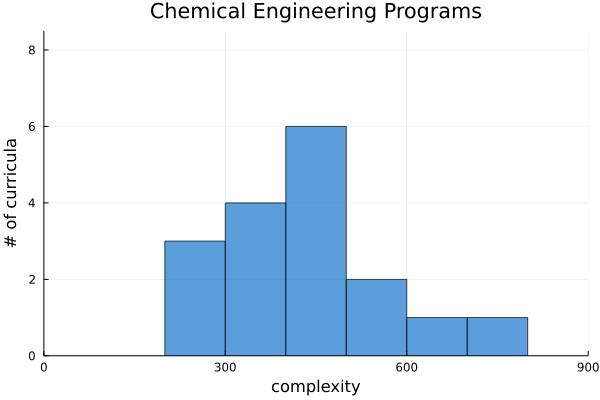

In [55]:
metric = "complexity"
stats = basic_statistics(currics, "complexity")
println(String(take!(stats))); flush(stdout)  
display(metric_histogram(currics, metric, title="Chemical Engineering Programs", xlabel="$(metric)", 
          ylabel="# of curricula", xlim=(0,900)))

There are 120 (semester) credit hour programs at Stanford University, the University of New Mexico, the University of South Florida, and Yale University.

In [6]:
metrics = basic_metrics(AE_plan.curriculum)
println(String(take!(metrics)))


Georgia Institute of Technology 
Curriculum: Aerospace Engineering
  credit hours = 137
  number of courses = 48
  Blocking Factor --
    entire curriculum = 209
    max. value = 30, for course(s): MATH 1501 - Calculus I
  Centrality --
    entire curriculum = 1731
    max. value = 262, for course(s): MATH 1552 - Integral Calculus
  Delay Factor --
    entire curriculum = 229.0
    max. value = 7.0, for course(s): MATH 1501 - Calculus I, MATH 1552 - Integral Calculus, MATH 1553 - Intro to Linear Algebra, PHYS  2211 - Intro Physics 1, MATH 2551 - Multivariable Calculus, MATH 2552 - Differential Equations, AE 2010 - Termo and Fluid Fund., AE 2220 - Dynamics, AE 3030 - Aerodynamics, AE 3330 - AE Vehicle Performance, AE 3530 - Sys Dynamics & Vib, AE 3531 - Control Sys Analysis/Design, AE  4341/2/3 - Air/Space/Rotor Design, AE 4531 - Aircraft Flt Dynamics, AE 4532 - Spacecraft Flt Dynamics, AE 4610 - Dynamics & Controls Lab
  Complexity --
    entire curriculum = 438.0
    max. value = 37.

In [7]:
metrics = basic_metrics(EE_plan.curriculum)
println(String(take!(metrics)))


Georgia Institute of Technology 
Curriculum: Electrical Engineering - Electronic Devices and Circuit Technology
  credit hours = 129
  number of courses = 44
  Blocking Factor --
    entire curriculum = 127
    max. value = 19, for course(s): MATH 1551 - Differential Calculus
  Centrality --
    entire curriculum = 792
    max. value = 124, for course(s): ECE 2040 - Circuit Analysis
  Delay Factor --
    entire curriculum = 185.0
    max. value = 8.0, for course(s): MATH 1551 - Differential Calculus, MATH 1552 - Integral Calculus, PHYS  2211 - Intro Physics 1, PHYS  2212 - Intro. Physics 2, ECE 2040 - Circuit Analysis, ECE 3025 - Electromagnetics, Senior Design Sequence, Senior Design Sequence
  Complexity --
    entire curriculum = 312.0
    max. value = 27.0, for course(s): MATH 1551 - Differential Calculus
  Longest Path(s) --
    length = 8, number of paths = 1
    path(s):
    path 1 = MATH 1551 - Differential Calculus -> MATH 1552 - Integral Calculus -> PHYS  2211 - Intro Physic

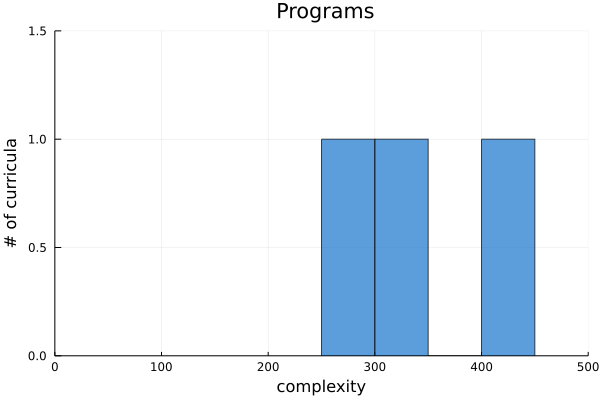

In [8]:
curricula = Array{Curriculum,1}()
metric = "complexity"
for (key, val) in plans
    push!(curricula, val.curriculum)
end
display(metric_histogram(curricula, metric, title=" Programs", xlabel="$(metric)", ylabel="# of curricula", xlim=(0,500)))

# Extraneous Prerequisites
The following function will find prerequisites in a curriculum.  These are redundant prerequisites that are unnecessary in a curriculum.  For example, if a curriculum has the prerequisite 
relationships $c_1 \rightarrow c_2 \rightarrow c_3$ and $c_1 \rightarrow c_3$, and $c_1$ and $c_2$ are 
*not* co-requisites, then $c_1 \rightarrow c_3$ is redundant and therefore extraneous.  Extraneous prerequisites do not effect the curricular complexity metric, they simply are unnecessary clutter in a curriculum or degree plan.

In [9]:
for plan in plans
    extraneous_requisites(plan[2].curriculum, print=true)
end


Georgia Institute of Technology: curriculum Aerospace Engineering has extraneous requisites:
-Statics has redundant requisite Integral Calculus



Georgia Institute of Technology: curriculum Electrical Engineering - Electronic Devices and Circuit Technology has extraneous requisites:
-Digital Design Lab has redundant requisite Fund. of Digital System Design
-Microelectronic Circuits has redundant requisite Differential Equations
-Electromagnetics has redundant requisite Differential Equations
-Measurements, Circuits and Microelectronics Lab has redundant requisite Digital Design Lab



## Dead End Courses
The following function can be used to find "dead end" courses in a curricula.  Dead end courses are those that appear at the end of a path (i.e., sink vertices), and are not a part of a course associated with the major.  E.g., in the case of the ECE curriculum above, these would be courses at the end of a path that do not have the "ECE" or "ENGR" prefix.  One might consider these courses dead ends, as their course outcomes are not (formally) used by any 
major-specific course, i.e., by any course with the prefix "ECE."

In [10]:
prefixes = Dict{String, Array{String,1}}()
prefixes["Electrical Engineering"] = ["ECE"];
prefixes["Electrical Engineering - Electronic Devices and Circuit Technology"] = ["ECE"];
prefixes["Aerospace Engineering"] = ["AE"];

In [11]:
for plan in plans
    de = dead_ends(plan[2].curriculum, prefixes[plan[2].curriculum.name])
    println("\nDead end courses in the $(plan[2].curriculum.name) curriculum:")
    for course in de[2]
        println("$(course.prefix) $(course.num): $(course.name)")
    end
end


Dead end courses in the Aerospace Engineering curriculum:
ENGL 1102: English Composition II
ECE 3741: Circuits /Electronics Lab
AE  4341/2/3: Air/Space/Rotor Design

Dead end courses in the Electrical Engineering curriculum:

Dead end courses in the Electrical Engineering - Electronic Devices and Circuit Technology curriculum:
ENGL 1102: English Composition II


# Degree Plan Optimization 
The Curricular Analytics toolbox contains a number of functions that will create different degree plans for a curriculum depending upon various optimization criteria.  In order to use these functions, you must first install the Gourbi solver, called [Gurobi Optimizer](https://www.gurobi.com/downloads/gurobi-optimizer-eula). Gurobi is a commercial product, and requires a license key; however, [academic licenses](https://www.gurobi.com/downloads/end-user-license-agreement-academic) are available at no cost.

In [12]:
# Uncomment the following two lines if the Gurobi package has not yet been included in your Julia environment.
#using Pkg
#Pkg.add("Gurobi")
using Gurobi

In [13]:
metrics = basic_metrics(EE_plan)
println(String(take!(metrics)))


Curriculum: Electrical Engineering - Electronic Devices and Circuit Technology
Degree Plan: 2021-22 Plan
  total credit hours = 129
  number of terms = 8
  max. credits in a term = 17, in term 1
  min. credits in a term = 14, in term 8
  avg. credits per term = 16.125, with std. dev. = 1.0532687216470449



In [14]:
EE_new_1 = optimize_plan(EE_plan.curriculum, 8, 12, 18, balance_obj);
visualize(EE_new_1, notebook=true)

Academic license - for non-commercial use only
An optimal solution was found with objective value = 14.0


WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol, Any}(:src => "https://curricula-api-embed.damoursystems.com/", :id => "curriculum", :events => Dict{Symbol, WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Electrical Engineering - Electronic Devices and Circuit Technology\",\"dp_name\":\"\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"MATH 1551\",\"metrics\":{\"complexity\":27.0,\"centrality\":0,\"blocking factor\":19,\"delay factor\":8.0},\"nameSub\":\"Differential Calculus\",\"id\":5,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":6,\"type\":\"CurriculumCorequisite\"}],\"name\":\"MATH 1554\",\"metrics\":{\"complexity\":19.0,\"centrality\":55,\"blocking factor\":12,\"delay factor\":7.0},\"nameSub\":\"Linear Algebra\",\"id\":6,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CHEM 1310\",\"metrics\":{\"complexity\":6.0,\"centrality\":0,\"blocking factor\":3,\"delay factor\":3.0},\"nameSub\":\"General Chemistry\",\"id\":1,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CS 1301\",\"metrics\":{\"complexity\":16.0,\"centrality\":0,\"blocking factor\":10,\"delay factor\":6.0},\"nameSub\":\"Intro to Computing\",\"id\":2,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Humanities Elective\",\"id\":27,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":9,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MATH 1552\",\"metrics\":{\"complexity\":25.0,\"centrality\":111,\"blocking factor\":17,\"delay factor\":8.0},\"nameSub\":\"Integral Calculus\",\"id\":9,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ECE 3400\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":31,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 1101\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"English Composition I\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ECE 4452\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":38,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":9,\"target_id\":10,\"type\":\"CurriculumCorequisite\"}],\"name\":\"PHYS  2211\",\"metrics\":{\"complexity\":20.0,\"centrality\":46,\"blocking factor\":12,\"delay factor\":8.0},\"nameSub\":\"Intro Physics 1\",\"id\":10,\"credits\":4,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":10,\"target_id\":16,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"PHYS  2212\",\"metrics\":{\"complexity\":19.0,\"centrality\":46,\"blocking factor\":11,\"delay factor\":8.0},\"nameSub\":\"Intro. Physics 2\",\"id\":16,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":7,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"ECE 2020\",\"metrics\":{\"complexity\":11.0,\"centrality\":41,\"blocking factor\":5,\"delay factor\":6.0},\"nameSub\":\"Fund. of Digital System Design\",\"id\":7,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Social Science Elective\",\"id\":40,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":15,\"type\":\"CurriculumPrerequisite

In [15]:
metrics = basic_metrics(EE_new_1)
println(String(take!(metrics)))


Curriculum: Electrical Engineering - Electronic Devices and Circuit Technology
Degree Plan: 
  total credit hours = 129
  number of terms = 8
  max. credits in a term = 17, in term 2
  min. credits in a term = 16, in term 1
  avg. credits per term = 16.125, with std. dev. = 0.33071891388307384



In [16]:
#curric = deepcopy(EE_plan.curriculum)
#convert_ids(curric)
#toxic = Array{Pair{Course,Course},1}()
# Differential Calc is toxic to Linear Algebra
#push!(toxic, course(curric, "MATH", "1551", "Differential Calculus", "") => course(curric, "MATH", "1554", "Linear Algebra", ""))

In [17]:
EE_new_2 = optimize_plan(EE_plan.curriculum, 8, 12, 18, req_distance_obj);
visualize(EE_new_2, notebook=true)

Academic license - for non-commercial use only
An optimal solution was found with objective value = 35.0


WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol, Any}(:src => "https://curricula-api-embed.damoursystems.com/", :id => "curriculum", :events => Dict{Symbol, WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Electrical Engineering - Electronic Devices and Circuit Technology\",\"dp_name\":\"\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"ECE 3450\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":30,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Elective Hours\",\"id\":44,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ECE 3400\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":31,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 1101\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"English Composition I\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Elective Hours\",\"id\":33,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"APPH 1040\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":26,\"credits\":2,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"MATH 1551\",\"metrics\":{\"complexity\":27.0,\"centrality\":0,\"blocking factor\":19,\"delay factor\":8.0},\"nameSub\":\"Differential Calculus\",\"id\":5,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":6,\"type\":\"CurriculumCorequisite\"}],\"name\":\"MATH 1554\",\"metrics\":{\"complexity\":19.0,\"centrality\":55,\"blocking factor\":12,\"delay factor\":7.0},\"nameSub\":\"Linear Algebra\",\"id\":6,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ECE 4452\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":38,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"ENGL 1102\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"English Composition II\",\"id\":8,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Social Science Elective\",\"id\":32,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":9,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MATH 1552\",\"metrics\":{\"complexity\":25.0,\"centrality\":111,\"blocking factor\":17,\"delay factor\":8.0},\"nameSub\":\"Integral Calculus\",\"id\":9,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ECE 3005\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":28,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ECE 1100\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ECE Discovery Studio\",\"id\":3,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CS 1301\",\"metrics\":{\"complexity\":16.0,\"ce

In [18]:
metrics = basic_metrics(EE_new_2)
println(String(take!(metrics)))


Curriculum: Electrical Engineering - Electronic Devices and Circuit Technology
Degree Plan: 
  total credit hours = 129
  number of terms = 8
  max. credits in a term = 18, in term 4
  min. credits in a term = 12, in term 2
  avg. credits per term = 16.125, with std. dev. = 1.8328597873268975



In [44]:
EE_new_3 = optimize_plan(EE_plan.curriculum, 8, 12, 18, [balance_obj, req_distance_obj]);
visualize(EE_new_3, notebook=true)

Academic license - for non-commercial use only
An optimal solution was found with objective value = 14.0


WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol, Any}(:src => "https://curricula-api-embed.damoursystems.com/", :id => "curriculum", :events => Dict{Symbol, WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Electrical Engineering - Electronic Devices and Circuit Technology\",\"dp_name\":\"\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"MATH 1551\",\"metrics\":{\"complexity\":27.0,\"centrality\":0,\"blocking factor\":19,\"delay factor\":8.0},\"nameSub\":\"Differential Calculus\",\"id\":5,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":6,\"type\":\"CurriculumCorequisite\"}],\"name\":\"MATH 1554\",\"metrics\":{\"complexity\":19.0,\"centrality\":55,\"blocking factor\":12,\"delay factor\":7.0},\"nameSub\":\"Linear Algebra\",\"id\":6,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 1101\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"English Composition I\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ECE 3005\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":28,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"History/Government Elective\",\"id\":11,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Social Science Elective\",\"id\":40,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":9,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MATH 1552\",\"metrics\":{\"complexity\":25.0,\"centrality\":111,\"blocking factor\":17,\"delay factor\":8.0},\"nameSub\":\"Integral Calculus\",\"id\":9,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"ENGL 1102\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"English Composition II\",\"id\":8,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Elective Hours\",\"id\":39,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CS 1301\",\"metrics\":{\"complexity\":16.0,\"centrality\":0,\"blocking factor\":10,\"delay factor\":6.0},\"nameSub\":\"Intro to Computing\",\"id\":2,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":9,\"target_id\":10,\"type\":\"CurriculumCorequisite\"}],\"name\":\"PHYS  2211\",\"metrics\":{\"complexity\":20.0,\"centrality\":46,\"blocking factor\":12,\"delay factor\":8.0},\"nameSub\":\"Intro Physics 1\",\"id\":10,\"credits\":4,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":10,\"target_id\":16,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"PHYS  2212\",\"metrics\":{\"complexity\":19.0,\"centrality\":46,\"blocking factor\":11,\"delay factor\":8.0},\"nameSub\":\"Intro. Physics 2\",\"id\":16,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":12,\"type\":\"CurriculumPrerequisite\"},{\"source_id\":9,\"target_id\":12,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"ECE 2026\",\"metrics\":{\"complexity\":9.0,\"centrality\":11,\"blocking factor\":3,\"delay factor\":6.0},\"nameSub\":\"Intro. to Signa

In [45]:
metrics = basic_metrics(EE_new_3)
println(String(take!(metrics)))


Curriculum: Electrical Engineering - Electronic Devices and Circuit Technology
Degree Plan: 
  total credit hours = 129
  number of terms = 8
  max. credits in a term = 17, in term 7
  min. credits in a term = 16, in term 1
  avg. credits per term = 16.125, with std. dev. = 0.33071891388307384



In [38]:
#EE_new_4 = optimize_plan(EE_plan.curriculum, 8, 12, 18, [balance_obj, req_distance_obj], toxic_courses=toxic);
#visualize(EE_new_4, notebook=true)

## References
<a id='References'></a>

[1] Heileman, G. L., Abdallah, C.T., Slim, A., and Hickman, M. (2018). Curricular analytics: A framework for quantifying the impact of curricular reforms and pedagogical innovations. www.arXiv.org, arXiv:1811.09676 [cs.CY].

[2] Heileman, G. L., Free, H. W., Abar, O. and Thompson-Arjona, W. G, (2019). CurricularAnalytics.jl Toolbox. https://github.com/heileman/CurricularAnalytics.jl.